In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = "/content/drive/MyDrive/data.zip"

In [3]:
import shutil

In [4]:
shutil.unpack_archive(path, "/content/drive/MyDrive")

In [5]:
mypath = "/content/drive/MyDrive/data"

In [34]:
from os import listdir, path
from os.path import isfile, join
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

activities = listdir(mypath)
activities

['data_2d.csv', 'mnist.csv']

In [10]:
df_data_2d = pd.read_csv(mypath + '/data_2d.csv')

In [11]:
df_data_2d.head(6)

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
5,0.0,1.503020,1.074847


In [47]:
df_data_2d.shape

(199, 3)

In [12]:
df_mnist = pd.read_csv(mypath + '/mnist.csv')

In [46]:
df_mnist.head(6)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# mnist



In [27]:
data_mnist = df_mnist.values

In [28]:
if 'label' in df_mnist.columns:
    data_mnist = df_mnist.drop('label', axis=1).values

In [29]:
kmeans = KMeans(n_clusters=10, random_state=42)

In [30]:
kmeans.fit(data_mnist)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [32]:
labels = kmeans.labels_
labels

array([1, 3, 5, 9, 3, 2, 6, 9, 2, 5, 1, 2, 5, 8, 4, 9, 2, 4, 6, 2, 0, 0,
       7, 6, 5, 6, 9, 5, 8, 7, 8, 4, 0, 2, 1, 2, 8, 1, 8, 8, 2, 6, 3, 8,
       4, 8, 3, 9, 9, 3, 4, 7, 4, 1, 5, 9, 3, 9, 3, 6, 0, 6, 1, 2, 6, 1,
       9, 7, 5, 2, 5, 1, 2, 8, 2, 4, 2, 3, 2, 6, 0, 1, 6, 7, 9, 2, 4, 0,
       3, 4, 0, 3, 7, 8, 0, 8, 2, 0, 9, 0, 5, 7, 9, 9, 9, 1, 3, 6, 2, 7,
       3, 8, 6, 2, 2, 6, 9, 2, 0, 7, 0, 6, 0, 2, 6, 4, 7, 7, 7, 0, 0, 7,
       2, 7, 8, 5, 3, 0, 2, 3, 6, 4, 3, 2, 8, 2, 1, 5, 3, 9, 9, 2, 4, 8,
       7, 0, 5, 4, 8, 6, 0, 7, 9, 0, 4, 6, 3, 8, 6, 6, 2, 4, 4, 1, 3, 8,
       7, 8, 7, 8, 7, 3, 5, 1, 6, 1, 4, 5, 8, 3, 8, 5, 6, 5, 3, 8, 0, 6,
       1, 7, 0, 3, 8, 3, 4, 2, 4, 1, 6, 9, 2, 9, 8, 6, 5, 4, 3, 2, 3, 6,
       1, 0, 2, 3, 1, 7, 2, 3, 2, 1, 4, 7, 2, 2, 6, 1, 1, 9, 8, 7, 7, 0,
       6, 3, 3, 5, 3, 9, 1, 6, 8, 6, 4, 2, 2, 1, 3, 1, 5, 2, 3, 6, 2, 6,
       8, 7, 8, 4, 5, 4, 5, 8, 2, 9, 9, 8, 7, 1, 8, 1, 2, 2, 3, 9, 1, 3,
       9, 3, 4, 9, 1, 6, 1, 5, 9, 5, 5, 1, 7, 3, 2,

In [33]:
centroids = kmeans.cluster_centers_
centroids

array([[5.4       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.44444444, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [6.7027027 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [5.88461538, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.32692308, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [5.89189189, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [36]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_mnist)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [38]:
sse

[1602784611.1983972,
 1493124992.878355,
 1399791447.4382534,
 1344031953.503737,
 1305409015.9230626,
 1270060296.9166832,
 1238435338.303512,
 1212231450.2610466,
 1189222725.9140978,
 1170164095.1016874]

Можна помітити, що спад значень стає менш помітним після кількості кластерів близько 4-5. Таким чином, оптимальна кількість кластерів для набору даних mnist може бути 4 або 5

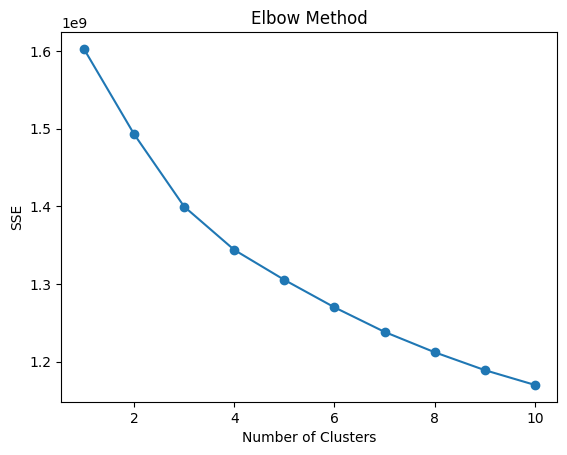

In [37]:
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


# Завдання 2
Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоримтом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_mnist.iloc[:, 1:])

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,4.851672,-12.347375
1,-7.016797,-5.613020
2,8.542389,-0.406590
3,1.165420,6.612904
4,-7.669361,-5.342725
...,...,...
494,8.614319,-2.382483
495,-3.274249,7.275139
496,-6.226468,0.339903
497,0.356651,-0.366999


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

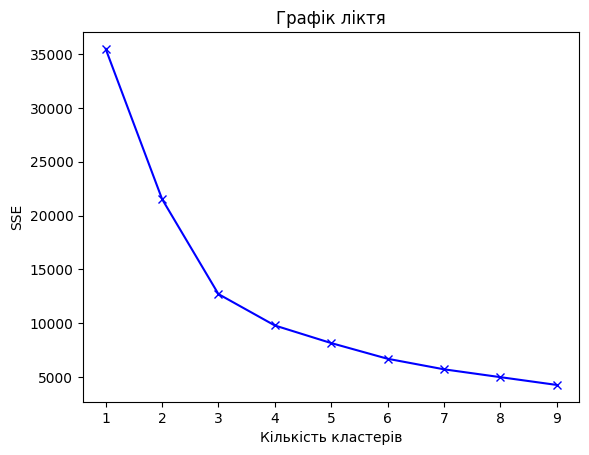

In [44]:
k_values = range(1, 10)
sse_pca = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca)
    sse_pca.append(kmeans.inertia_)  # SSE

plt.plot(k_values, sse_pca, 'bx-')
plt.xlabel('Кількість кластерів')
plt.ylabel('SSE')
plt.title('Графік ліктя')
plt.show()

In [45]:
sse_pca

[35476.04236039109,
 21532.35677684411,
 12707.570078179791,
 9792.007483850464,
 8158.012604427724,
 6701.4901193171845,
 5721.365521493102,
 4992.89280430703,
 4269.975060781491]

### За результатами ліктового методу, ми можемо зробити наступні висновки:

1. З використанням оригінального набору даних без зменшення розмірності, ми спостерігаємо спад SSE зі збільшенням кількості кластерів. Однак, зміна SSE стає менш помітною після кількості кластерів, рівної 5 або 6. Це може вказувати на те, що оптимальна кількість кластерів може бути 5 або 6.

2. Після застосування PCA для зменшення розмірності до 2, ми спостерігаємо, що SSE значно зменшилось. При цьому, зміна SSE також стає менш помітною зі збільшенням кількості кластерів. Оптимальна кількість кластерів може бути 3 або 4.

Враховуючи ці результати, можна зробити висновок, що застосування методу головних компонент для зменшення розмірності даних MNIST до 2 може поліпшити якість кластеризації, в порівнянні з використанням оригінальних даних. Оптимальна кількість кластерів для оригінального датасету може бути 5 або 6, тоді як для зменшеного датасету може бути 3 або 4.

# data_2d.csv

In [48]:
k_values = range(1, 10)
sse_data_2d = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_data_2d)
    sse_data_2d.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [49]:
sse_data_2d

[858.964541763682,
 362.7751486474807,
 281.886088375722,
 217.25229624975304,
 181.60318906122936,
 147.3932286108963,
 128.65816493156984,
 117.93011339738783,
 104.49100939189714]

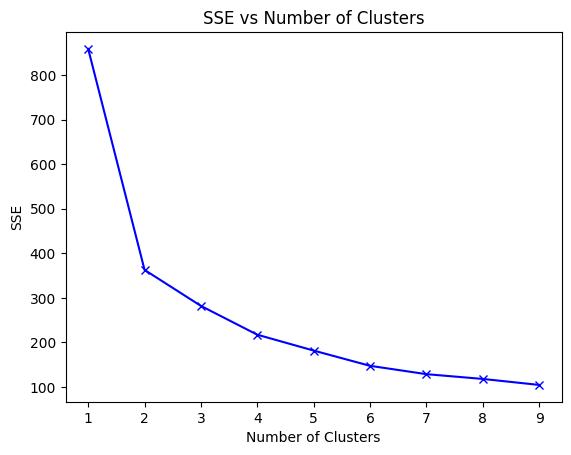

In [51]:
plt.plot(k_values, sse_data_2d, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('SSE vs Number of Clusters')
plt.show()


На основі значень SSE, які були отримані, можна спостерігати, що SSE зменшується зі збільшенням кількості кластерів. Однак, існує значна зміна SSE від 1 до 2 кластерів, після чого зменшення стає більш плавним. "Точка ліктя" на графіку, яка вказує на оптимальну кількість кластерів, зазвичай є тим місцем, де темп зменшення SSE стає меншим. В даному випадку, точка ліктя знаходиться приблизно на 2 або 3 кластерах.

Таким чином, на основі значень SSE та методу "ліктя", можна рекомендувати використовувати 2 або 3 кластери для цього датасету